# **House_Price_Prediction**

### **Problem_Statement:**

* ## Predict house Price using regression in King County, USA,
* ## The Given dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.
  [Clicke here to access the dataset](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction)


<img src = "https://miro.medium.com/v2/resize:fit:704/0*S0RD9WszR44AbOds.png" height = '300px' width = "800px">

# Import Required Libraries

In [1]:
# load libraries
import zipfile
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# Unzipping dataset

In [2]:
import zipfile
import os

# Unzip the dataset
with zipfile.ZipFile('/content/House_Price_Prediction.zip', 'r') as zip_ref:
    zip_ref.extractall('house_price_data')

# List the files in the extracted directory
os.listdir('house_price_data')


['kc_house_data.csv']

# Data Collection

In [3]:
import pandas as pd

# Load the dataset
data_path = '/content/house_price_data/kc_house_data.csv'
data = pd.read_csv(data_path)

# Check the first few rows of the dataset
print(data.head())


           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

In [4]:
# Check the shape of the dataset
print(data.shape)

(21613, 21)


In [5]:
# Check for missing values
print(data.isnull().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


# Perform Exploratory Data Analysis (EDA)

In [6]:
# Check for duplicates
print(data.duplicated().sum())


0


In [7]:
# Data overview
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

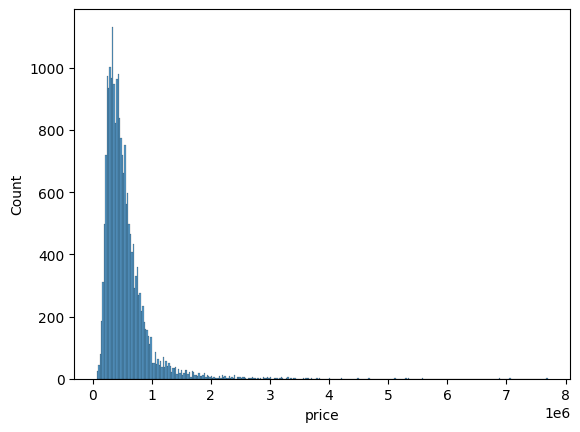

In [8]:
# visualize the distribution of the target variable
sns.histplot(data['price'])
plt.show()

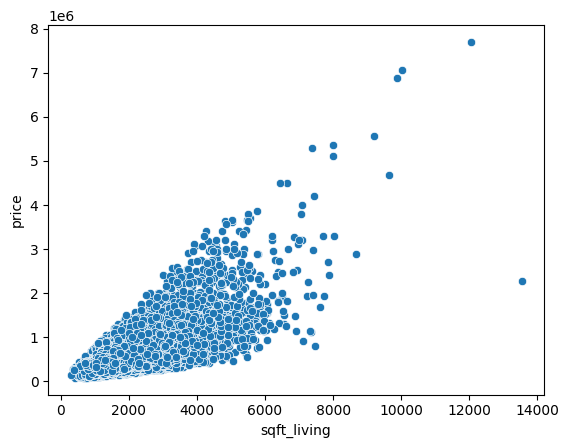

In [9]:
# visualize the relationship between sqft_living and price
sns.scatterplot(x=data['sqft_living'], y=data['price'])
plt.show()


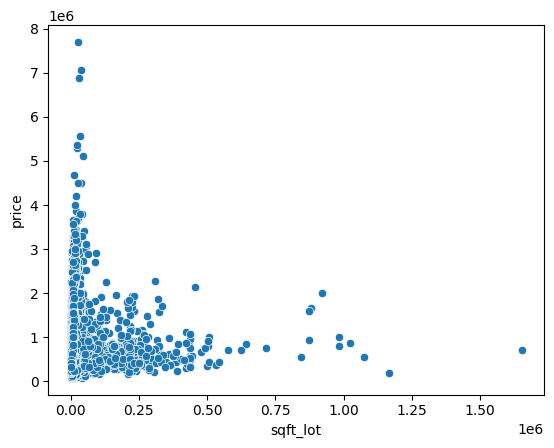

In [10]:
# visualize the relationship between sqft_lot and price
sns.scatterplot(x=data['sqft_lot'], y=data['price'])
plt.show()

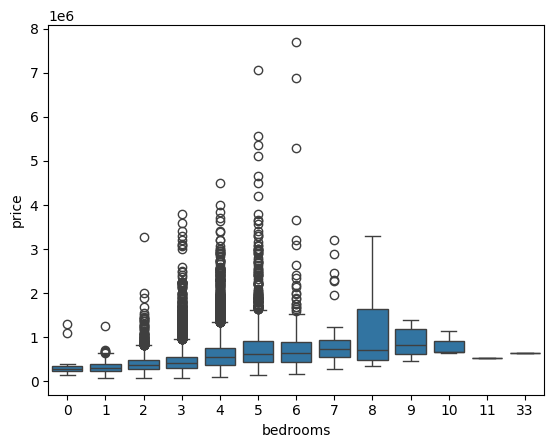

In [11]:
# Visualize Boxplot
sns.boxplot(x=data['bedrooms'], y=data['price'])
plt.show()


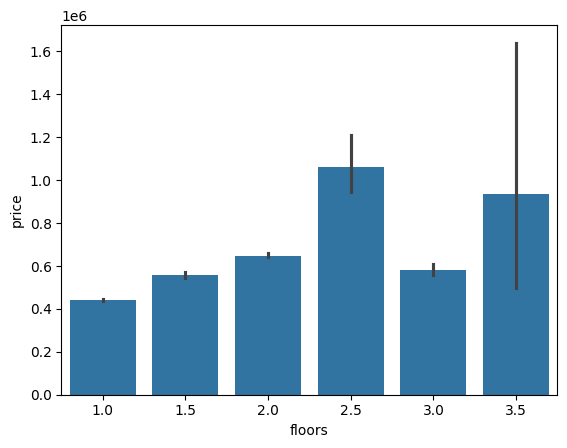

In [12]:
# Visualize barplot
sns.barplot(x=data['floors'], y=data['price'])
plt.show()

# Data Preprocessing

In [13]:
# Handling missing values (if any)
data = data.dropna()

In [14]:
# Feature engineering
data['yr_renovated'] = np.where(data['yr_renovated'] == 0, data['yr_built'], data['yr_renovated'])
data['age'] = 2021 - data['yr_built']
data = data.drop(['id', 'date', 'yr_built', 'zipcode', 'lat', 'long'], axis=1)

In [15]:
# Encoding categorical variables (if any)
data = pd.get_dummies(data)

In [16]:
# Normalize/scale the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop('price', axis=1))
scaled_data = pd.DataFrame(scaled_features, columns=data.columns.drop('price'))
scaled_data['price'] = data['price'].values

In [17]:
# Splitting data into training and testing sets
X = scaled_data.drop('price', axis=1)
y = scaled_data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training

In [18]:
# Model Building
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# Model Prediction and Evaluation

In [19]:
# Model Prediction
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
y_pred = model_rf.predict(X_test)
y_pred

array([469861.28, 672877.11, 951004.  , ..., 359822.74, 434231.81,
       478808.  ])

In [20]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")

MAE: 120745.19363003259
MSE: 44486907773.68625
RMSE: 210919.1972620943
R-squared: 0.70572909603894


**Our RandomForest Model is giving the R_2 Score of 0.7 Which is Reasonably a well score**

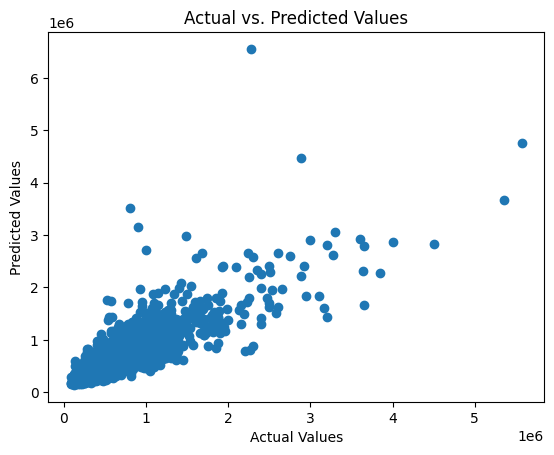

In [21]:
# Visualize the results
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

# Let Try other Regressor Models:

In [22]:
# Importing Libraries-
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [23]:
# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Support Vector Regressor": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor()
}


In [24]:
# Initialize the results DataFrame with the correct column names
results = pd.DataFrame(columns=["Model", "MAE", "MSE", "RMSE", "R2"])


In [25]:
# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    result = pd.DataFrame([[name, mae, mse, rmse, r2]], columns=["Model", "MAE", "MSE", "RMSE", "R2"])
    results = pd.concat([results, result], ignore_index=True)

print(results)

<ipython-input-25-3accfda1af47>:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, result], ignore_index=True)


                      Model            MAE           MSE           RMSE  \
0         Linear Regression  143200.002218  5.230673e+10  228706.643317   
1         Gradient Boosting  127038.592022  4.456412e+10  211102.145140   
2  Support Vector Regressor  229201.475706  1.606210e+11  400775.488192   
3       K-Nearest Neighbors  134922.077816  4.693345e+10  216641.302673   

         R2  
0  0.654003  
1  0.705218  
2 -0.062472  
3  0.689546  


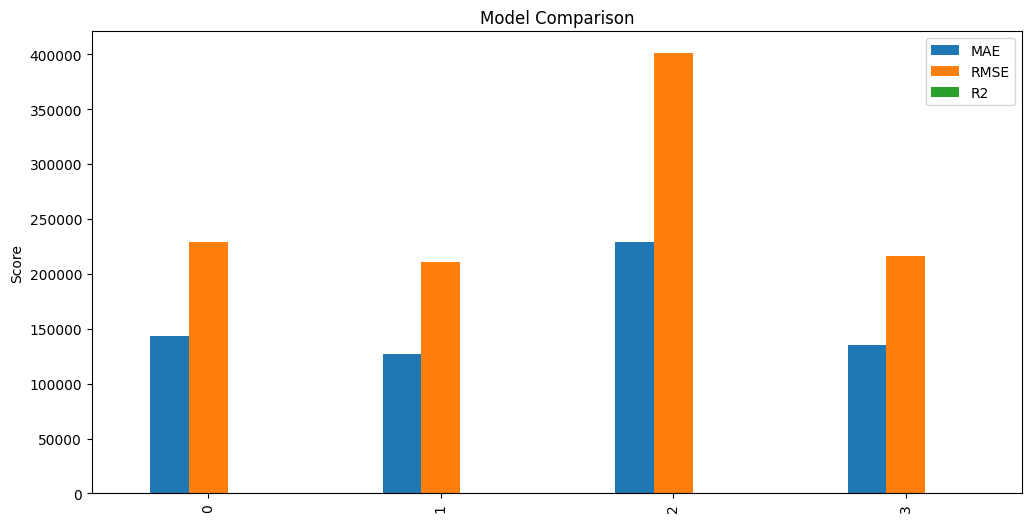

In [26]:
# Plot the comparison
results[['MAE', 'RMSE', 'R2']].plot(kind='bar', figsize=(12, 6))
plt.title("Model Comparison")
plt.ylabel("Score")
plt.show()


# Saving a Best Model:

In [27]:
# saving Random Forest Regressor model
joblib.dump(model_rf, 'house_price_model.pkl')

['house_price_model.pkl']

In [28]:
# Load the saved model
loaded_model = joblib.load('house_price_model.pkl')

In [32]:
X_test.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_renovated', 'sqft_living15', 'sqft_lot15', 'age'],
      dtype='object')

# Model Testing

In [33]:
# Make predictions using the loaded model
prediction = loaded_model.predict(X_test)

# Print the prediction
print(f"Predicted house price: ${prediction[0]:,.2f}")


Predicted house price: $469,861.28
